In [16]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
import qiskit  
# Loading your IBM Q account(s)
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
from qiskit import execute
from qiskit import BasicAer as Aer
from qiskit import IBMQ
import numpy as np
from qiskit.visualization import plot_histogram
np.set_printoptions(precision=3, suppress=True)

# provider = IBMQ.load_account()

backend = Aer.get_backend('qasm_simulator')

In [17]:
q1 = QuantumRegister(2)
q2 = QuantumRegister(2)
c1 = ClassicalRegister(2)
c2 = ClassicalRegister(2)
circuit = QuantumCircuit(q1, q2, c1, c2)

circuit.h(q1)

circuit.barrier()

circuit.cx(q1[0], q2[0])
circuit.cx(q1[0], q2[1])
circuit.cx(q1[1], q2[0])
circuit.cx(q1[1], q2[1])

circuit.barrier()

circuit.measure(q2,c1)

circuit.barrier()

circuit.h(q1)

circuit.barrier()

circuit.measure(q1,c2)

circuit_drawer(circuit)

In [18]:
job = execute(circuit, backend, shots=100)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'00 11': 20, '00 00': 30, '11 00': 24, '11 11': 26}


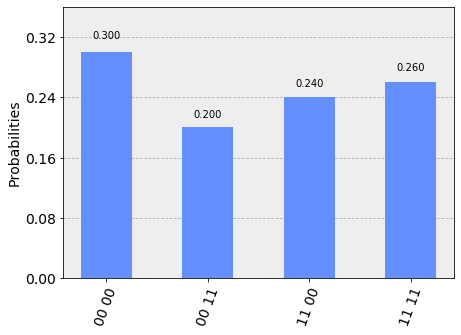

In [19]:
plot_histogram(counts)